<a href="https://colab.research.google.com/github/Adrian-Bulambao/CPE-313/blob/main/Hands_on_Activity_2_3_Regularization_Bulambao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 1.3 : Regularization

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Predictive Analytics using Machine Learning
2nd Semester | AY 2025-2026
<u>**Hands-on Activity 2.3** | **Regularization**
**Name** | Adrian Justin Bulambao
**Section** | CPE32S3
**Date Performed**: | January 15, 2026
**Date Submitted**: | January 15, 2026
**Instructor**: | Engr. Neal Barton James Matira


#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [ ]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Get the size of the sample train data

In [ ]:
x_train[0].shape

(28, 28)

Check the sample train data

In [ ]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 253, 252,
        252, 252, 252, 253, 252, 252, 252, 252, 245,  80,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 246, 205,  69,
         69,  69,  69,  69,  69,  69,  69, 205, 253, 240,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 187, 252, 218,  34,
          0,   0,   0,   0,   0,   0,   0, 116, 253, 252,  69,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 248, 252, 253,  92,
          0,   0,   0,   0,   0,   0,  95, 230, 253, 157,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 249, 253, 189,  42,
          0,   0,   0,   0,  36, 170, 253, 243, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 252, 245, 140,
         34,   0,   0,  57, 219, 252, 235,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 205, 253, 252,
        234, 184, 184, 253, 240, 100,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 161, 219,
        252, 252, 252, 234,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 203,
        252, 252, 252, 251, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  76, 255, 253,
        205, 168, 220, 255, 253, 137,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 252, 249, 132,
         25,   0,   0, 180, 252, 252,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 220, 252, 199,   0,
          0,   0,   0,  38, 186, 252, 154,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 252,  21,   0,
          0,   0,   0,   0,  67, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 200,   0,   0,
          0,   0,   0,   0,  47, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 201,   0,   0,
          0,   0,   0,   3, 118, 253, 245,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252,   0,   0,
          0,   0,   0,  97, 252, 252,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 240, 252, 123,  70,
         70, 112, 184, 222, 252, 170,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 253, 252,
        252, 252, 252, 245, 139,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Check the corresponding label in the training set

In [ ]:

y_train[333]

np.uint8(8)

Check the actual image

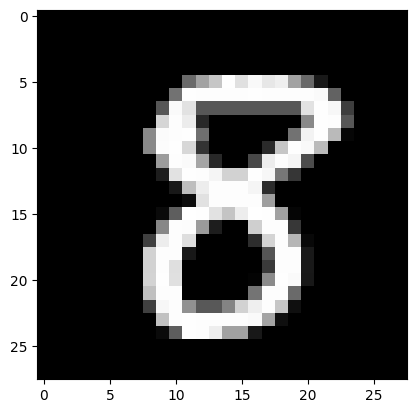

In [ ]:
plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [ ]:

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [ ]:

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [ ]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [ ]:

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [ ]:
l_r = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=l_r),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7598 - loss: 0.7933 - val_accuracy: 0.9373 - val_loss: 0.2023
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9235 - loss: 0.2620 - val_accuracy: 0.9539 - val_loss: 0.1469
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9406 - loss: 0.2017 - val_accuracy: 0.9624 - val_loss: 0.1202
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9502 - loss: 0.1700 - val_accuracy: 0.9657 - val_loss: 0.1122
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9550 - loss: 0.1504 - val_accuracy: 0.9694 - val_loss: 0.0989
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9559 - loss: 0.1455 - val_accuracy: 0.9698 - val_loss: 0.0986
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9605 - loss: 0.1333 - val_accuracy: 0.9739 - val_loss: 0.0897
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9641 - loss: 0.1180 - val_accuracy: 0.

Use Keras evaluate function to evaluate performance on the test set

In [ ]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09800669550895691
Test accuracy: 0.9753000140190125


The model had a high accuracy, it did not overfit as the

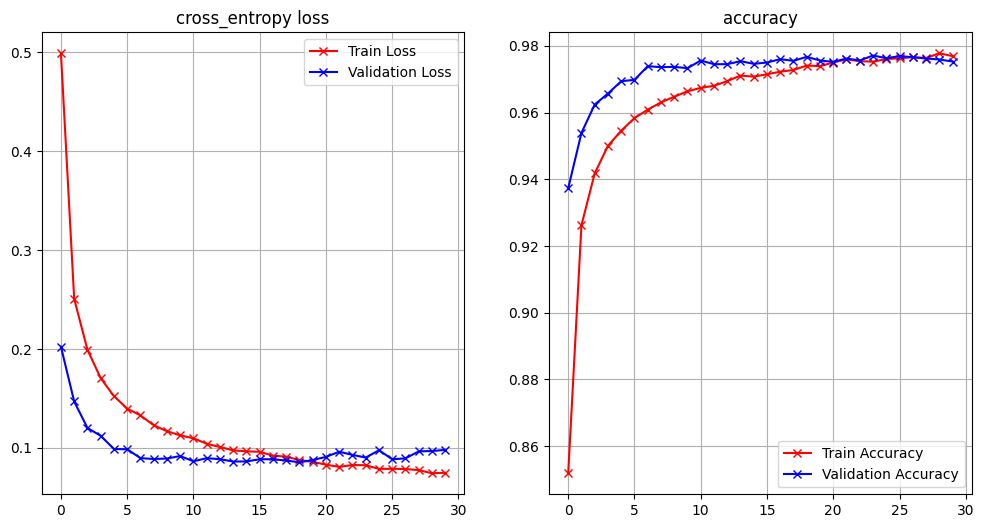

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

Interpret the result

#type your answer here

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

<hr>

  1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer

In [ ]:
from tensorflow.keras.layers import Input
model1 = Sequential()
model1.add(Input(shape=(784,)))
model1.add(Dense(400, activation='relu'))
model1.add(Dropout(0.4))
model1.add(Dense(300, activation='relu'))
model1.add(Dropout(0.4))
model1.add(Dense(10, activation='softmax'))


4. How many parameters does your model have? How does it compare with the previous model?

In [ ]:
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 300)            │       120,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 437,310 (1.67 MB)

 Trainable params: 437,310 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

In [ ]:
l_r = .001
model1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=l_r),
              metrics=['accuracy'])
batch_size = 128
epochs = 20
history = model1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8273 - loss: 0.5534 - val_accuracy: 0.9612 - val_loss: 0.1223
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9514 - loss: 0.1635 - val_accuracy: 0.9717 - val_loss: 0.0958
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9636 - loss: 0.1213 - val_accuracy: 0.9757 - val_loss: 0.0797
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9679 - loss: 0.1064 - val_accuracy: 0.9747 - val_loss: 0.0837
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9744 - loss: 0.0870 - val_accuracy: 0.9768 - val_loss: 0.0786
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9755 - loss: 0.0797 - val_accuracy: 0.9805 - val_loss: 0.0658
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9794 - loss: 0.0696 - val_accuracy: 0.9808 - val_loss: 0.0667
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9806 - loss: 0.0645 - val_ac

In [ ]:
score1 = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.09800669550895691
Test accuracy: 0.9753000140190125


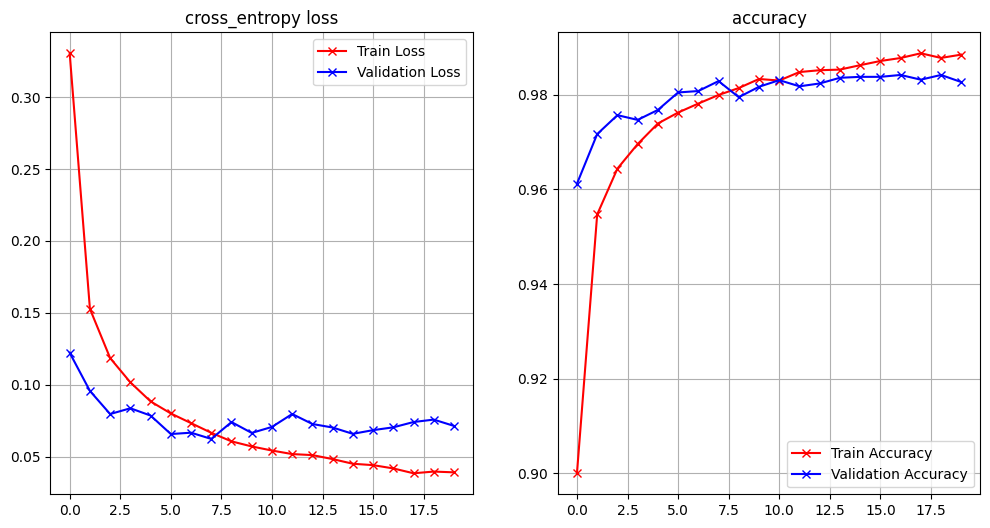

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

It can be seen in the graph that the model was doing well being close to training accuracy, however, at the epoch 7, it starts to overfit as the validation accuracy drops lower than the training accuracy

6. Use at least two  regularization techniques and apply it to the new model (model_2)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras import regularizers


input = Input((784,), name="input_1")

l2_regularizer = regularizers.L2(l2=1e-3)

x = Dense(256, activation = 'relu', kernel_regularizer=l2_regularizer, name="dense_1")(input)
x = Dropout(0.4)(x)
x = Dense(128, activation = 'relu', kernel_regularizer=l2_regularizer, name="dense_2")(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
x = Dense(64, activation = 'relu', kernel_regularizer=l2_regularizer, name="dense_3")(x)




output = Dense(10, activation = 'softmax', name="output_1")(x)


model2 = Model(inputs = input, outputs = output, name="nmist")
model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


model2.summary()

Model: "nmist"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_1 (InputLayer)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_59 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_1 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,274 (950.29 KB)

 Trainable params: 243,018 (949.29 KB)

 Non-trainable params: 256 (1.00 KB)

7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [ ]:
from keras.callbacks import EarlyStopping



early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.001,
    mode='min',
    verbose=1,
    restore_best_weights=True
)


In [ ]:
l_r = .001
model2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=l_r),
              metrics=['accuracy'])
batch_size = 128
epochs = 100
history = model2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    callbacks=[early_stopping],
    validation_data=(x_test, y_test))

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7850 - loss: 1.1887 - val_accuracy: 0.9579 - val_loss: 0.4265
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9387 - loss: 0.4620 - val_accuracy: 0.9674 - val_loss: 0.2929
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9501 - loss: 0.3346 - val_accuracy: 0.9660 - val_loss: 0.2457
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9544 - loss: 0.2843 - val_accuracy: 0.9671 - val_loss: 0.2180
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9539 - loss: 0.2595 - val_accuracy: 0.9730 - val_loss: 0.1837
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9562 - loss: 0.2411 - val_accuracy: 0.9700 - val_loss: 0.1927
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9578 - loss: 0.2337 - val_accuracy: 0.9748 - val_loss: 0.1735
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9575 - loss: 0.2259 - 

In [ ]:
score2 = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.16162490844726562
Test accuracy: 0.977400004863739


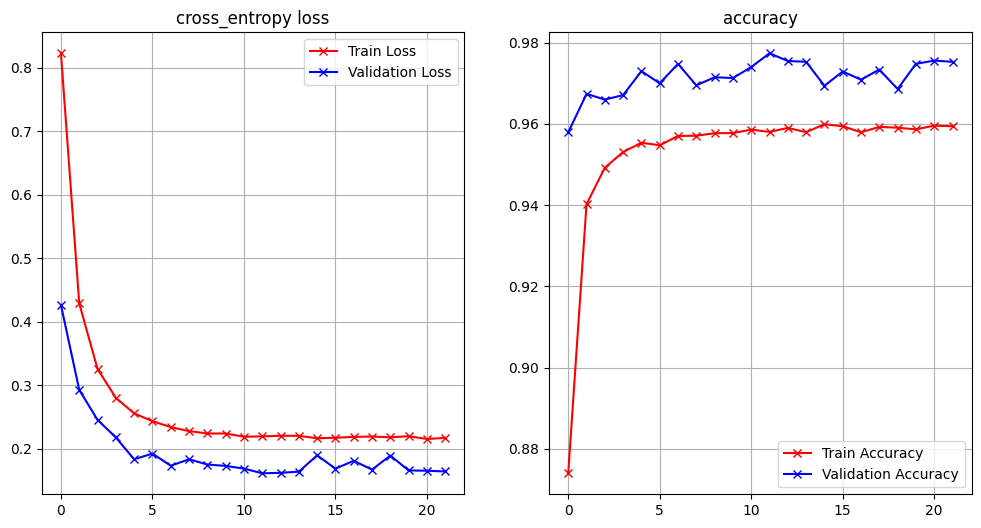

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

#### Conclusion

From this activity I was able to create a learning model for the mnist data. I learned that the batchnomalization is used to speed up the process of learning by nomalizing small batches of data and increasing the learning rate. And the l2 regularization adds penalties to the model if there is a high loss.